#Global Housing Market Analysis (2015-2024)

# Problem statement

**Goal of the Data:**

This dataset provides insights into the global housing market, covering various economic factors from 2015 to 2024. It includes details about property prices, rental yields, interest rates, and household income across multiple countries. This dataset is ideal for real estate analysis, financial forecasting, and market trend visualization.

**Descripton of Dataset:**

​The "Global Housing Market Analysis (2015-2024)" dataset provides comprehensive data on housing markets across various countries over a decade. This dataset is valuable for analyzing trends, price dynamics, and factors influencing the global housing market during this period

**About the Data:**

The Global Housing Market Analysis (2015-2024) dataset provides worldwide housing data, covering prices, economic indicators, mortgage rates, and market trends across multiple countries. It helps in trend analysis, investment decisions, policy-making, and predictive modeling of real estate markets.


*Link:* https://www.kaggle.com/datasets/atharvasoundankar/global-housing-market-analysis-2015-2024

#Libraries

In [1]:
#data wrangling and manipulation
import numpy as np #for numerical computatiions and array operations
import pandas as pd #for handling and manipulating structured data

#data visualization

import matplotlib.pyplot as plt #for basic plotting
import seaborn as sns #for advanced statistical visualizations

#Data preprocessing & feature engineering
from sklearn.preprocessing import StandardScaler #standardization (mean=0,variance=1)
from sklearn.preprocessing import MinMaxScaler #normaliazation (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder #encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder #converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer #handles missing values

#Dimentionality Reduction & feature selection

from sklearn.decomposition import PCA #principal component analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif #feature selection techniques

#Model Selection and Evaluation
from sklearn.model_selection import train_test_split #splits datasets into training and test sets
from sklearn.model_selection import cross_validate #performs cross-validation
from sklearn.model_selection import KFold #k-fold cross-validation
from sklearn.model_selection import GridSearchCV #Hyperparameter tuning usung grid search

#performance metrics

from sklearn.metrics import accuracy_score #Evaluates model accuracy
from sklearn.metrics import confusion_matrix #computes confusion matrix
from sklearn.metrics import classification_report #precision,recall,F1-score summary
from sklearn.metrics import precision_score #Precision metric
from sklearn.metrics import recall_score #recall metric
from sklearn.metrics import roc_auc_score #AUC-ROC score for evaluating classifiers
from sklearn import metrics #collection of evalution metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
#Handling Imbalanced Datasets

from imblearn.over_sampling import SMOTE #Sybthetic Minority over-sampling technique (for handling class imbalance)
from sklearn.utils import class_weight #assigns weights to imbalanced classes

#Machine Learning Algorithms - Classification

from sklearn.linear_model import LogisticRegression #Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbors classifier
from sklearn.svm import SVC #support vector classifier
from sklearn.ensemble import RandomForestClassifier #random forest classifier
from sklearn.naive_bayes import GaussianNB #naive bayes classifier
from xgboost import XGBClassifier #Extreme gradient boosting classifier
from sklearn.tree import DecisionTreeClassifier #decision tree classifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier #extra trees classifier
from sklearn.linear_model import SGDClassifier #Stochastic Gradient Descent classifier


#Utility Funtions

from sklearn.pipeline import make_pipeline #creates machine learning pipelines
from sklearn.datasets import make_classification #generates synthetic classification datasets
from sklearn import model_selection #Various model selection utilities
from sklearn import svm  #Support Vector Machines module
from sklearn import tree #decision tree-related utilites

#models
#for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR



# Reading and understanding of data

In [2]:
import pandas as pd
df=pd.read_csv('/content/global_housing_market_extended.csv')
df

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980514
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399
...,...,...,...,...,...,...,...,...,...,...,...
195,UAE,2020,160.153711,117.170365,7.390686,2.048681,4.061737,1.635019,1.955250,62.942477,109.059291
196,UAE,2021,95.004866,72.727315,9.636214,3.880091,2.943274,1.155810,0.608064,83.550496,141.366775
197,UAE,2022,175.533469,105.083237,5.838662,4.940674,3.344420,0.037365,1.943051,61.152790,142.140959
198,UAE,2023,126.147746,94.604103,8.934185,5.975589,4.638353,2.911469,-0.766718,75.552241,82.013520


In [3]:
df.shape

(200, 11)

In [4]:
df.head(10)

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980514
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399
5,USA,2020,146.252228,71.819775,7.680612,4.233551,1.701554,5.756677,1.712965,88.184968,141.586188
6,USA,2021,139.789998,114.531196,3.796433,2.479914,0.793977,0.602643,0.360371,68.140471,136.299001
7,USA,2022,115.675333,69.665416,7.884265,2.204621,5.714280,-1.403595,2.454104,83.167343,85.897255
8,USA,2023,80.552212,107.082300,9.361716,5.145036,5.513257,-1.407643,0.254630,63.476072,139.048274
9,USA,2024,142.329813,73.162862,3.572025,3.054912,2.613692,3.836849,1.231451,86.616382,107.777194


In [5]:
df.tail(10)

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
190,UAE,2015,95.202485,54.294474,10.026854,3.799002,0.878065,5.958931,-0.797768,80.851057,148.694314
191,UAE,2016,103.918010,59.957456,4.092464,3.016376,1.156798,3.537291,-0.781979,75.282664,149.735748
192,UAE,2017,161.397027,93.065361,5.756283,4.619479,3.925770,1.408667,-0.542514,86.598126,105.982772
193,UAE,2018,99.462251,75.743155,6.727168,5.637689,5.268493,4.154439,-0.961391,72.484620,108.507532
194,UAE,2019,81.919228,68.186925,9.842608,2.185549,3.979516,-0.278385,-0.957577,67.236044,148.069900
195,UAE,2020,160.153711,117.170365,7.390686,2.048681,4.061737,1.635019,1.955250,62.942477,109.059291
196,UAE,2021,95.004866,72.727315,9.636214,3.880091,2.943274,1.155810,0.608064,83.550496,141.366775
197,UAE,2022,175.533469,105.083237,5.838662,4.940674,3.344420,0.037365,1.943051,61.152790,142.140959
198,UAE,2023,126.147746,94.604103,8.934185,5.975589,4.638353,2.911469,-0.766718,75.552241,82.013520
199,UAE,2024,153.743377,85.855534,9.122050,1.708365,1.051148,3.730587,-0.747705,62.137702,70.968678


In [6]:
df.sample(10)

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
11,Canada,2016,90.789143,52.200043,8.727694,3.071780,3.805709,5.260532,-0.127477,72.311488,130.444091
178,Sweden,2023,102.665640,74.849741,3.624815,4.095299,0.939482,4.402852,-0.182008,76.200357,140.406327
103,Japan,2018,134.163421,94.343475,5.320989,2.196780,5.927047,5.875217,0.839916,65.150379,91.784586
185,Switzerland,2020,165.142496,64.595736,11.375357,2.081832,5.813423,1.044986,2.072910,86.041701,134.474032
89,India,2024,95.253904,90.340185,8.460435,3.620653,5.286888,5.474936,2.239490,73.525181,79.059044
88,India,2023,130.588868,92.801796,3.162992,5.860620,6.558769,2.521065,1.438278,87.674981,126.579091
43,France,2018,97.743954,102.543033,10.261513,6.452526,3.182015,0.976145,1.717445,70.224106,144.460586
151,Russia,2016,139.235033,113.865434,4.895960,4.614833,4.605141,3.864904,-0.539513,81.474749,142.722602
194,UAE,2019,81.919228,68.186925,9.842608,2.185549,3.979516,-0.278385,-0.957577,67.236044,148.069900
60,Spain,2015,175.405103,92.432224,5.057785,4.858503,4.517834,0.865302,-0.602548,80.147196,111.624616


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                200 non-null    object 
 1   Year                   200 non-null    int64  
 2   House Price Index      200 non-null    float64
 3   Rent Index             200 non-null    float64
 4   Affordability Ratio    200 non-null    float64
 5   Mortgage Rate (%)      200 non-null    float64
 6   Inflation Rate (%)     200 non-null    float64
 7   GDP Growth (%)         200 non-null    float64
 8   Population Growth (%)  200 non-null    float64
 9   Urbanization Rate (%)  200 non-null    float64
 10  Construction Index     200 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.3+ KB


In [8]:
df.describe()

,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2019.500000,130.381022,83.048370,7.237768,4.150621,3.649756,2.133722,0.722806,74.769891,111.204257
std,2.879489,28.752229,21.439858,2.576085,1.380222,1.881938,2.413270,1.035691,8.734246,24.309473
min,2015.000000,80.552212,50.354311,3.041688,1.537814,0.532110,-1.921833,-0.961391,60.172760,70.968678
25%,2017.000000,104.142562,60.466671,5.034207,3.045278,1.939199,-0.095628,-0.183320,66.923842,90.182198
50%,2019.500000,129.193653,83.721711,7.375697,4.329643,3.664625,2.307548,0.722372,75.100060,110.593807
75%,2022.000000,157.127098,100.604665,9.276196,5.217706,5.261720,4.272776,1.621317,82.677430,133.780445
max,2024.000000,179.971767,119.855388,11.879671,6.485623,6.912349,5.958931,2.497948,89.788944,149.735748


In [9]:
df.describe(include=['O'])

,Country
count,200
unique,20
top,USA
freq,10


#visualizations of the features

## Country

In [10]:
df['Country'].value_counts()

,count
Country,
USA,10
Canada,10
UK,10
Germany,10
France,10
Italy,10
Spain,10
Australia,10
India,10


<ipython-input-11-463d1016a035>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p=sns.countplot(x=df['Country'],palette='dark')


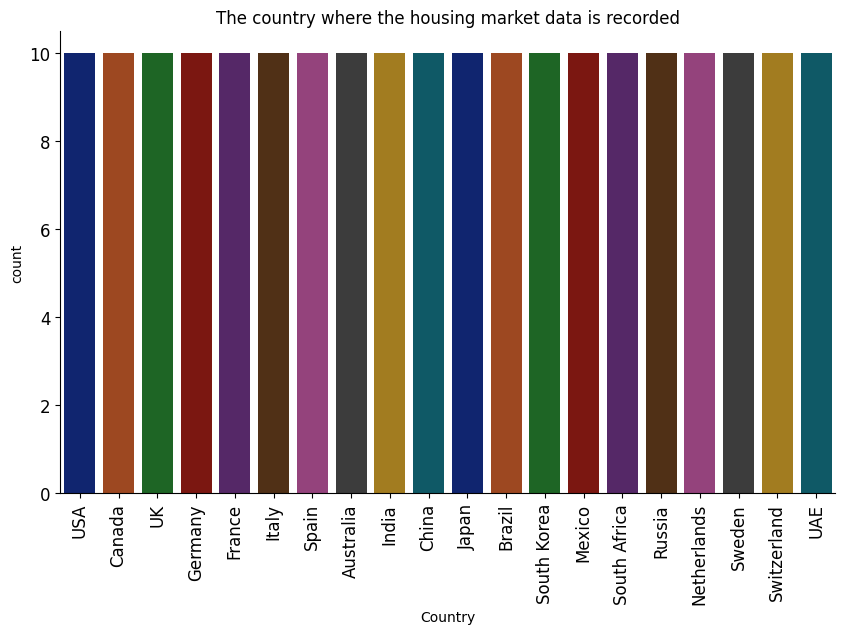

In [11]:
plt.figure(figsize=(10,6))
p=sns.countplot(x=df['Country'],palette='dark')
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.title('The country where the housing market data is recorded')
sns.despine(top=True,right=True)

Inference:The inference of country in the dataset is also explicit—it's directly provided in the Country column. Each row is labeled with a country name, indicating which country's housing and economic data the row represents

##Year

<ipython-input-12-081afb909524>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p=sns.countplot(x=df['Year'],palette='viridis')


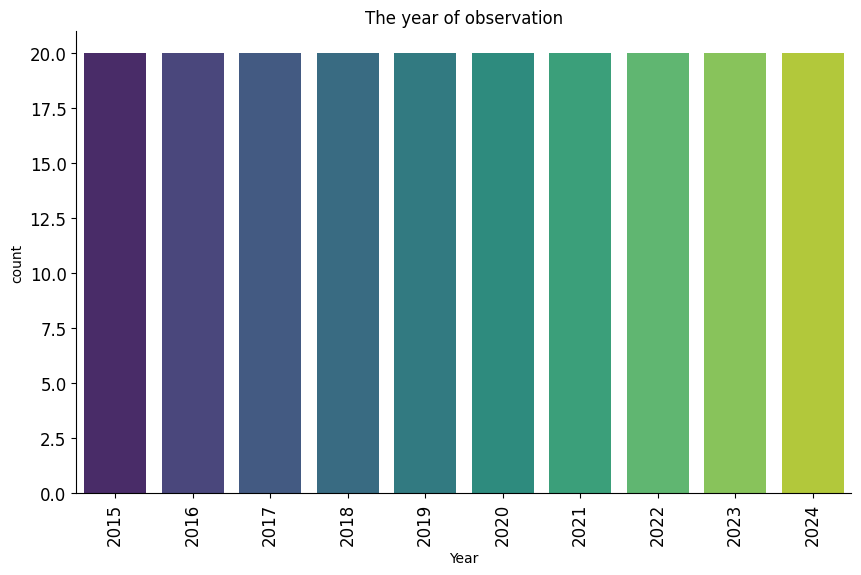

In [12]:
plt.figure(figsize=(10,6))
p=sns.countplot(x=df['Year'],palette='viridis')
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.title('The year of observation')
sns.despine(top=True,right=True)

Inference:The dataset contains information on various economic and housing market indicators. The Year column explicitly represents the year for each data entry. So, the inference of year in this dataset is straightforward—it's directly provided in the Year column

##House Price Index

In [13]:
df['House Price Index'].value_counts()

,count
House Price Index,
117.454012,1
150.807258,1
123.194502,1
131.423444,1
110.461377,1
...,...
160.153711,1
95.004866,1
175.533469,1


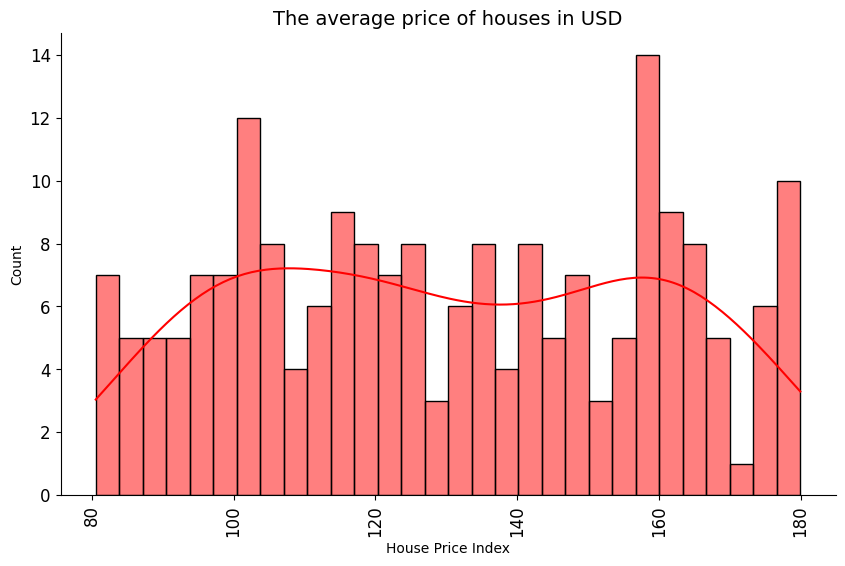

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['House Price Index'], bins=30,kde=True,color='red')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.title('The average price of houses in USD',fontsize=14)
sns.despine(top=True, right=True)
plt.show()

**Inference**

* Distribution Shape: Identifies if house prices are normally distributed or skewed.

* Most Common Prices: Peaks in the histogram show the most frequent price ranges.

* Market Variability: A wide spread suggests high price fluctuations, while a narrow spread indicates stability.

* KDE Curve: Highlights underlying price trends for better visualization.

##Rent Index

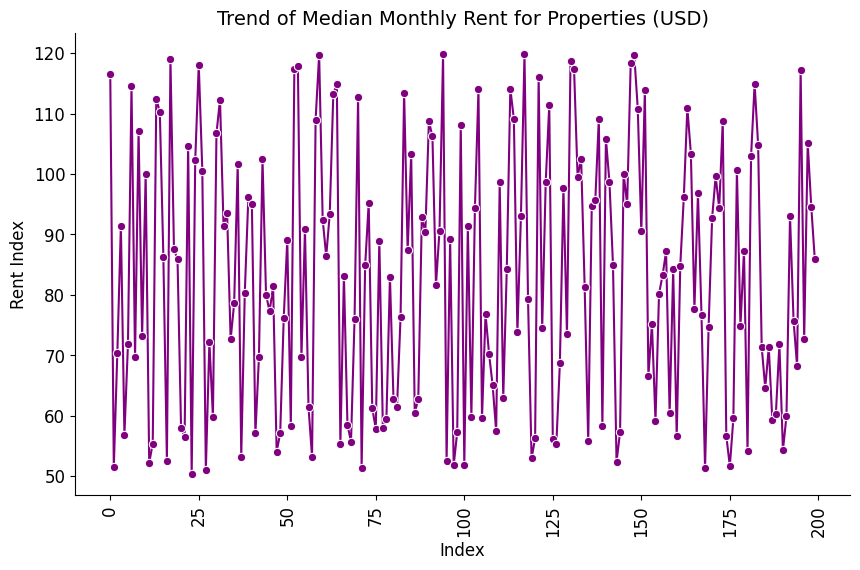

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.index,y=df['Rent Index'],color='purple',marker='o')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Rent Index", fontsize=12)
plt.title("Trend of Median Monthly Rent for Properties (USD)",fontsize=14)
sns.despine(top=True, right=True)
plt.show()

**inference**

* Trend Analysis: The plot shows how the Rent Index changes over time (or dataset index).

* Fluctuations: Peaks and dips indicate periods of rising or falling rent prices.

* Market Stability: A smooth trend suggests stability, while sharp changes indicate market volatility.

* Long-Term Patterns: Helps identify increasing, decreasing, or cyclical trends in rental prices.

##Affordability Ratio

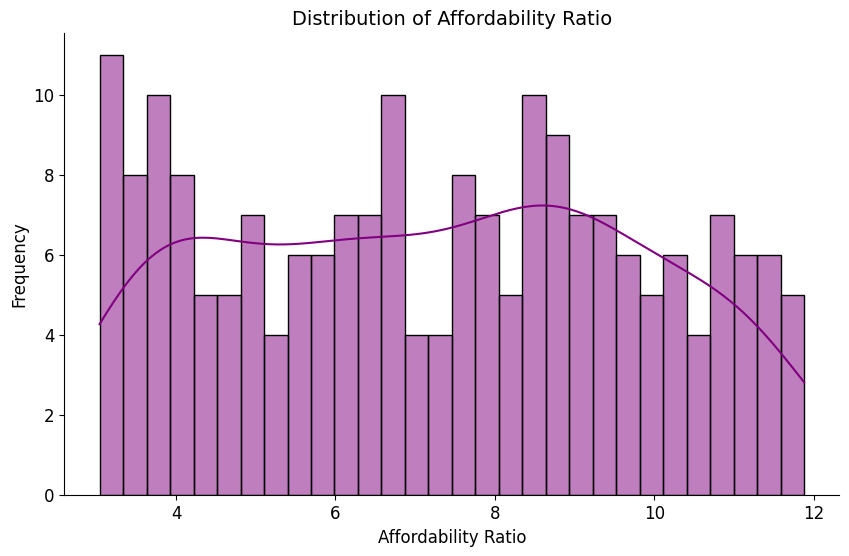

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['Affordability Ratio'],bins=30,kde=True,color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Affordability Ratio",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.title("Distribution of Affordability Ratio", fontsize=14)
sns.despine(top=True, right=True)
plt.show()

**inference**

* Common Ratios: Peaks indicate the most frequent affordability levels.

* Skewness: Shows whether housing is generally affordable or expensive.

* Market Trends: Wide distribution suggests varying affordability across regions.

* KDE Curve: Helps visualize overall affordability patterns.

## Mortgage Rate (%)

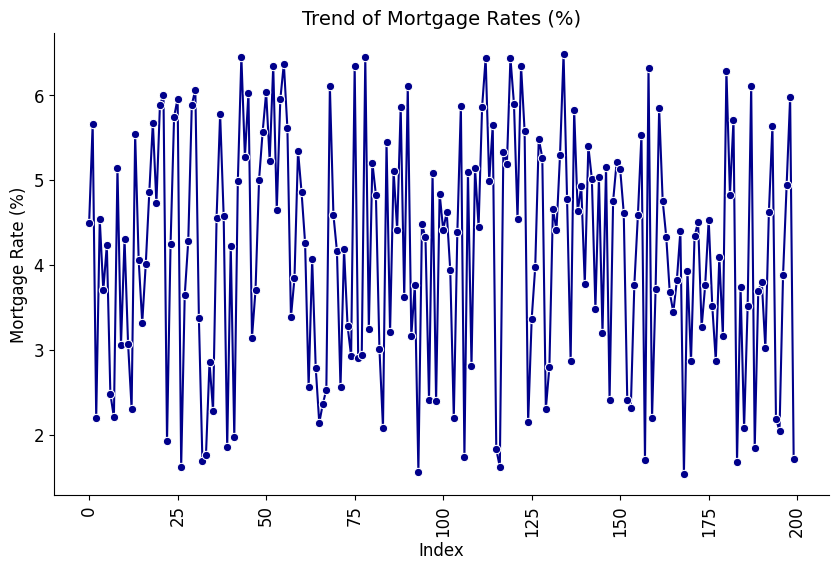

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.index, y=df['Mortgage Rate (%)'], color='darkblue', marker='o')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Mortgage Rate (%)", fontsize=12)
plt.title("Trend of Mortgage Rates (%)", fontsize=14)
sns.despine(top=True, right=True)
plt.show()

**Inference**

* Trend Analysis: Shows how mortgage rates change over time (or dataset index).

* Fluctuations: Peaks and dips indicate periods of rising or falling mortgage rates.

* Market Stability: A steady trend suggests stability, while sharp changes indicate volatility.

* Impact on Housing Market:

    Rising rates → Higher borrowing costs, lower affordability.

    Falling rates → Cheaper loans, increased homebuying activity.

##Inflation Rate (%)

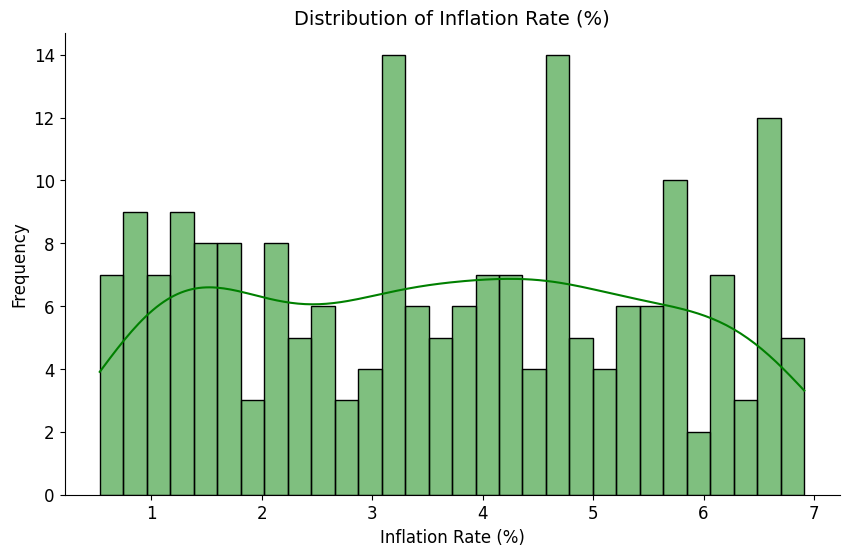

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df['Inflation Rate (%)'],bins=30,kde=True,color='green')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Inflation Rate (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Inflation Rate (%)", fontsize=14)
sns.despine(top=True, right=True)
plt.show()


**inference**

* Common Inflation Levels: Peaks show the most frequent rates.

* Skewness: Indicates whether inflation is generally high or low.

* Market Impact:

    High inflation → Higher living costs, reduced affordability.

    Low inflation → Price stability, better for investments.

* KDE Curve: Helps visualize overall inflation trends.

##GDP Growth (%)

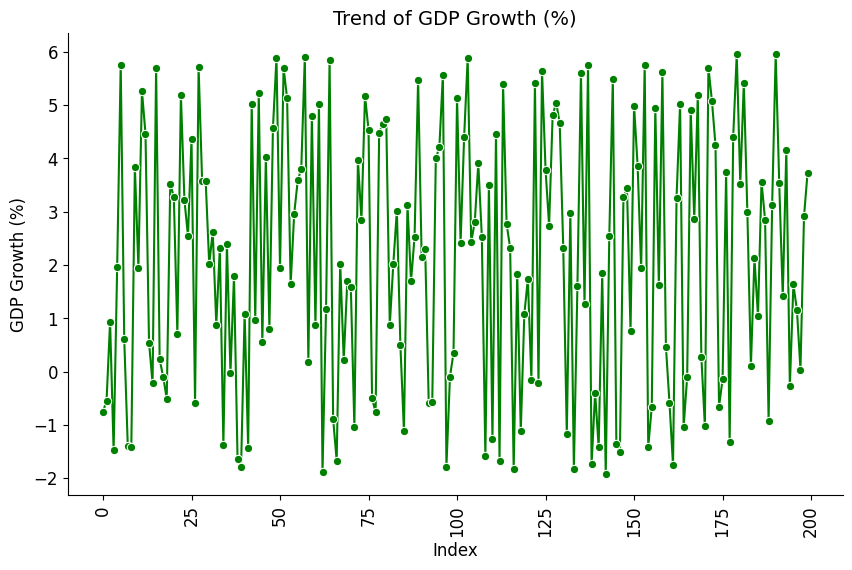

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.index, y=df['GDP Growth (%)'], color='green', marker='o')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("Index", fontsize=12)
plt.ylabel("GDP Growth (%)", fontsize=12)
plt.title("Trend of GDP Growth (%)", fontsize=14)
sns.despine(top=True, right=True)  #
plt.show()

**inference**

* Trend Analysis: Shows economic expansion or slowdowns.

* Peaks & Dips: Peaks indicate growth, dips suggest recessions.

* Market Stability: Steady trends show stability; sharp changes
  indicate volatility.

* Housing Impact:

    High GDP growth → Increased housing demand.

    Low/negative growth → Reduced investment in real estate.

##Population Growth

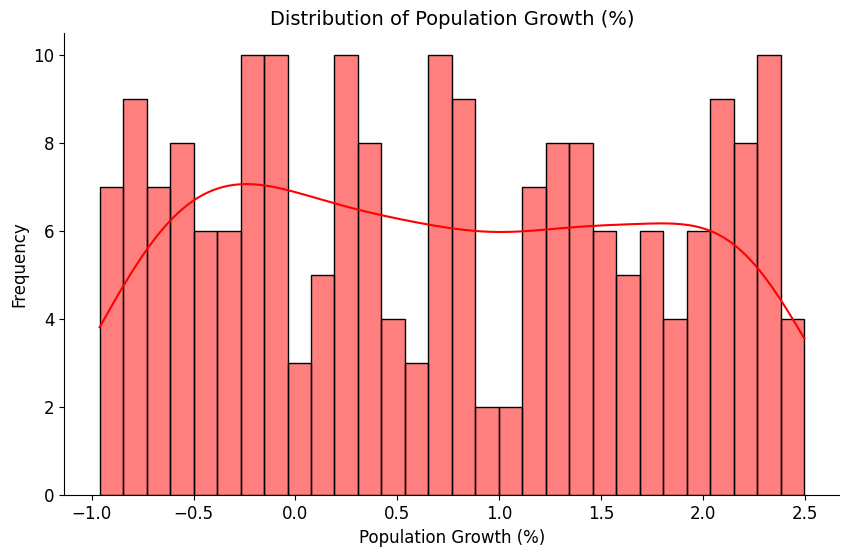

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df['Population Growth (%)'],bins=30,kde=True,color='r')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Population Growth (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Population Growth (%)", fontsize=14)
sns.despine(top=True, right=True)
plt.show()

**inference**

* Common Growth Rates: Peaks show the most frequent population growth percentages.

* Skewness: Indicates whether growth is mostly high or low.

* Market Impact:

    High growth → More housing demand.

    Low growth → Possible market stagnation.

* KDE Curve: Helps visualize overall trends.

##Urbanization Rate (%)

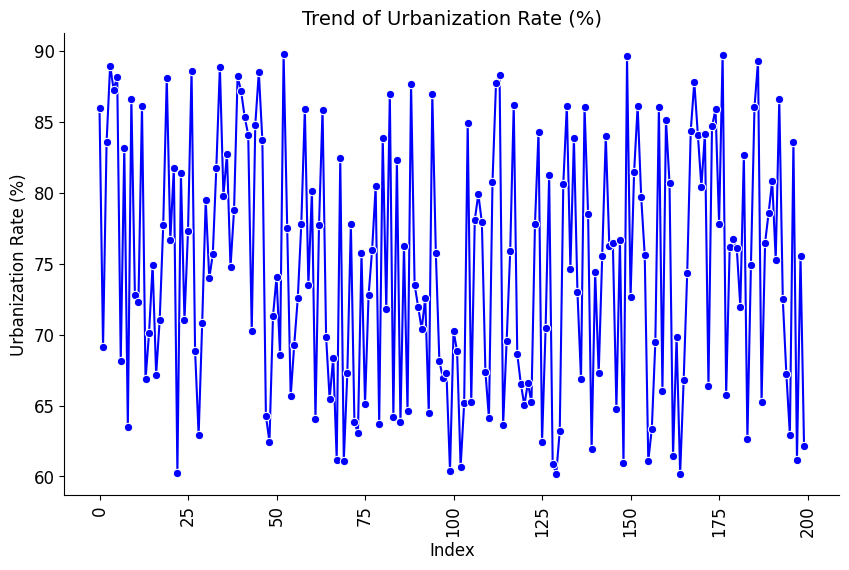

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df.index, y=df['Urbanization Rate (%)'], color='blue', marker='o')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Urbanization Rate (%)", fontsize=12)
plt.title("Trend of Urbanization Rate (%)", fontsize=14)
sns.despine(top=True, right=True)
plt.show()

**inference**

* Trend Analysis: Displays how the Urbanization Rate (%) changes over time.

* Growth Patterns: A steady upward trend suggests rapid urban expansion, while fluctuations indicate variable growth rates.

* Impact on Housing Market:

    Increasing urbanization → Higher housing demand, rising property prices.

    Slower urbanization → Stabilized housing demand, possible affordability improvements.

* Market Insights: Helps assess how urbanization trends affect real estate development and infrastructure needs.

##Construction Index

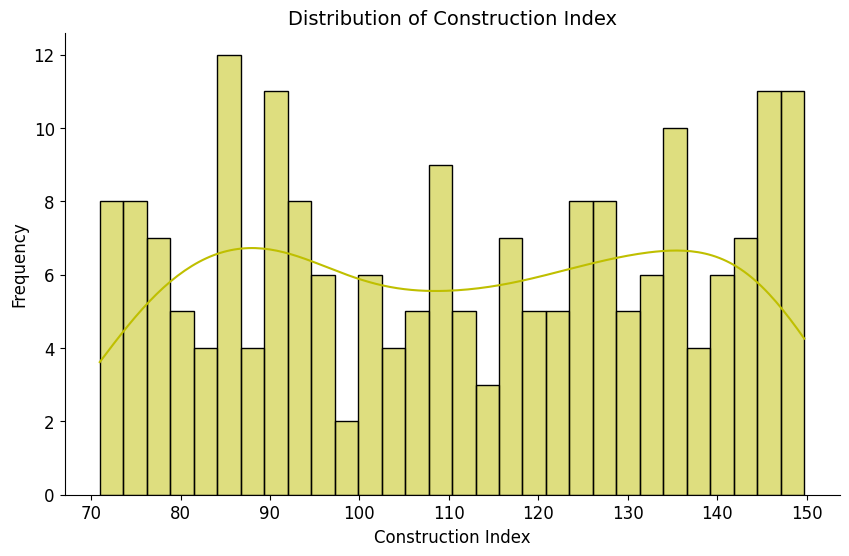

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['Construction Index'],bins=30,kde=True,color='y')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Construction Index", fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.title("Distribution of Construction Index",fontsize=14)
sns.despine(top=True, right=True)
plt.show()

**infernce**

* Construction Activity Distribution: Shows how construction levels vary across the dataset.

* Most Common Index Values: Peaks indicate the most frequent construction index levels.

* Skewness:

    Right-skewed: More instances of low construction activity with a few high spikes.

    Left-skewed: Indicates consistently high construction activity.

* Market Implications:

    High construction index → Strong housing supply, potential market growth.

    Low construction index → Limited new developments, possible housing shortages.

#Data cleaning

##Handling Duplicates

In [23]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [24]:
df.duplicated().sum()

np.int64(0)

##Handling missing values

In [25]:
df.isna().sum()

,0
Country,0
Year,0
House Price Index,0
Rent Index,0
Affordability Ratio,0
Mortgage Rate (%),0
Inflation Rate (%),0
GDP Growth (%),0
Population Growth (%),0
Urbanization Rate (%),0


No duplicates and missing values

## Converting Categorical variables to Numerical

In [26]:
# Columns of object type
cats_cols=df.columns[df.dtypes=='object']
cats_cols

Index(['Country'], dtype='object')

### Label encoding-Nominal encoding

In [27]:
# from sklearn.preprocessing import LabelEncoder
# cats_cols=df.columns[df.dtypes=='object']
# for cats_col in cats_cols:
#   le=LabelEncoder()
#   df[cats_col]=le.fit_transform(df[cats_col])
# df.head()

 ### Target encoding

In [28]:
# Set the target column and the categorical column to encode
target_col = 'House Price Index'
cat_col = 'Country'

# Calculate the mean of the target for each category
country_mean_target = df.groupby(cat_col)[target_col].mean()

# Replace each category with its corresponding mean value
df[cat_col] = df[cat_col].map(country_mean_target)


#Data Transformation

## Skewed data

## Histograms

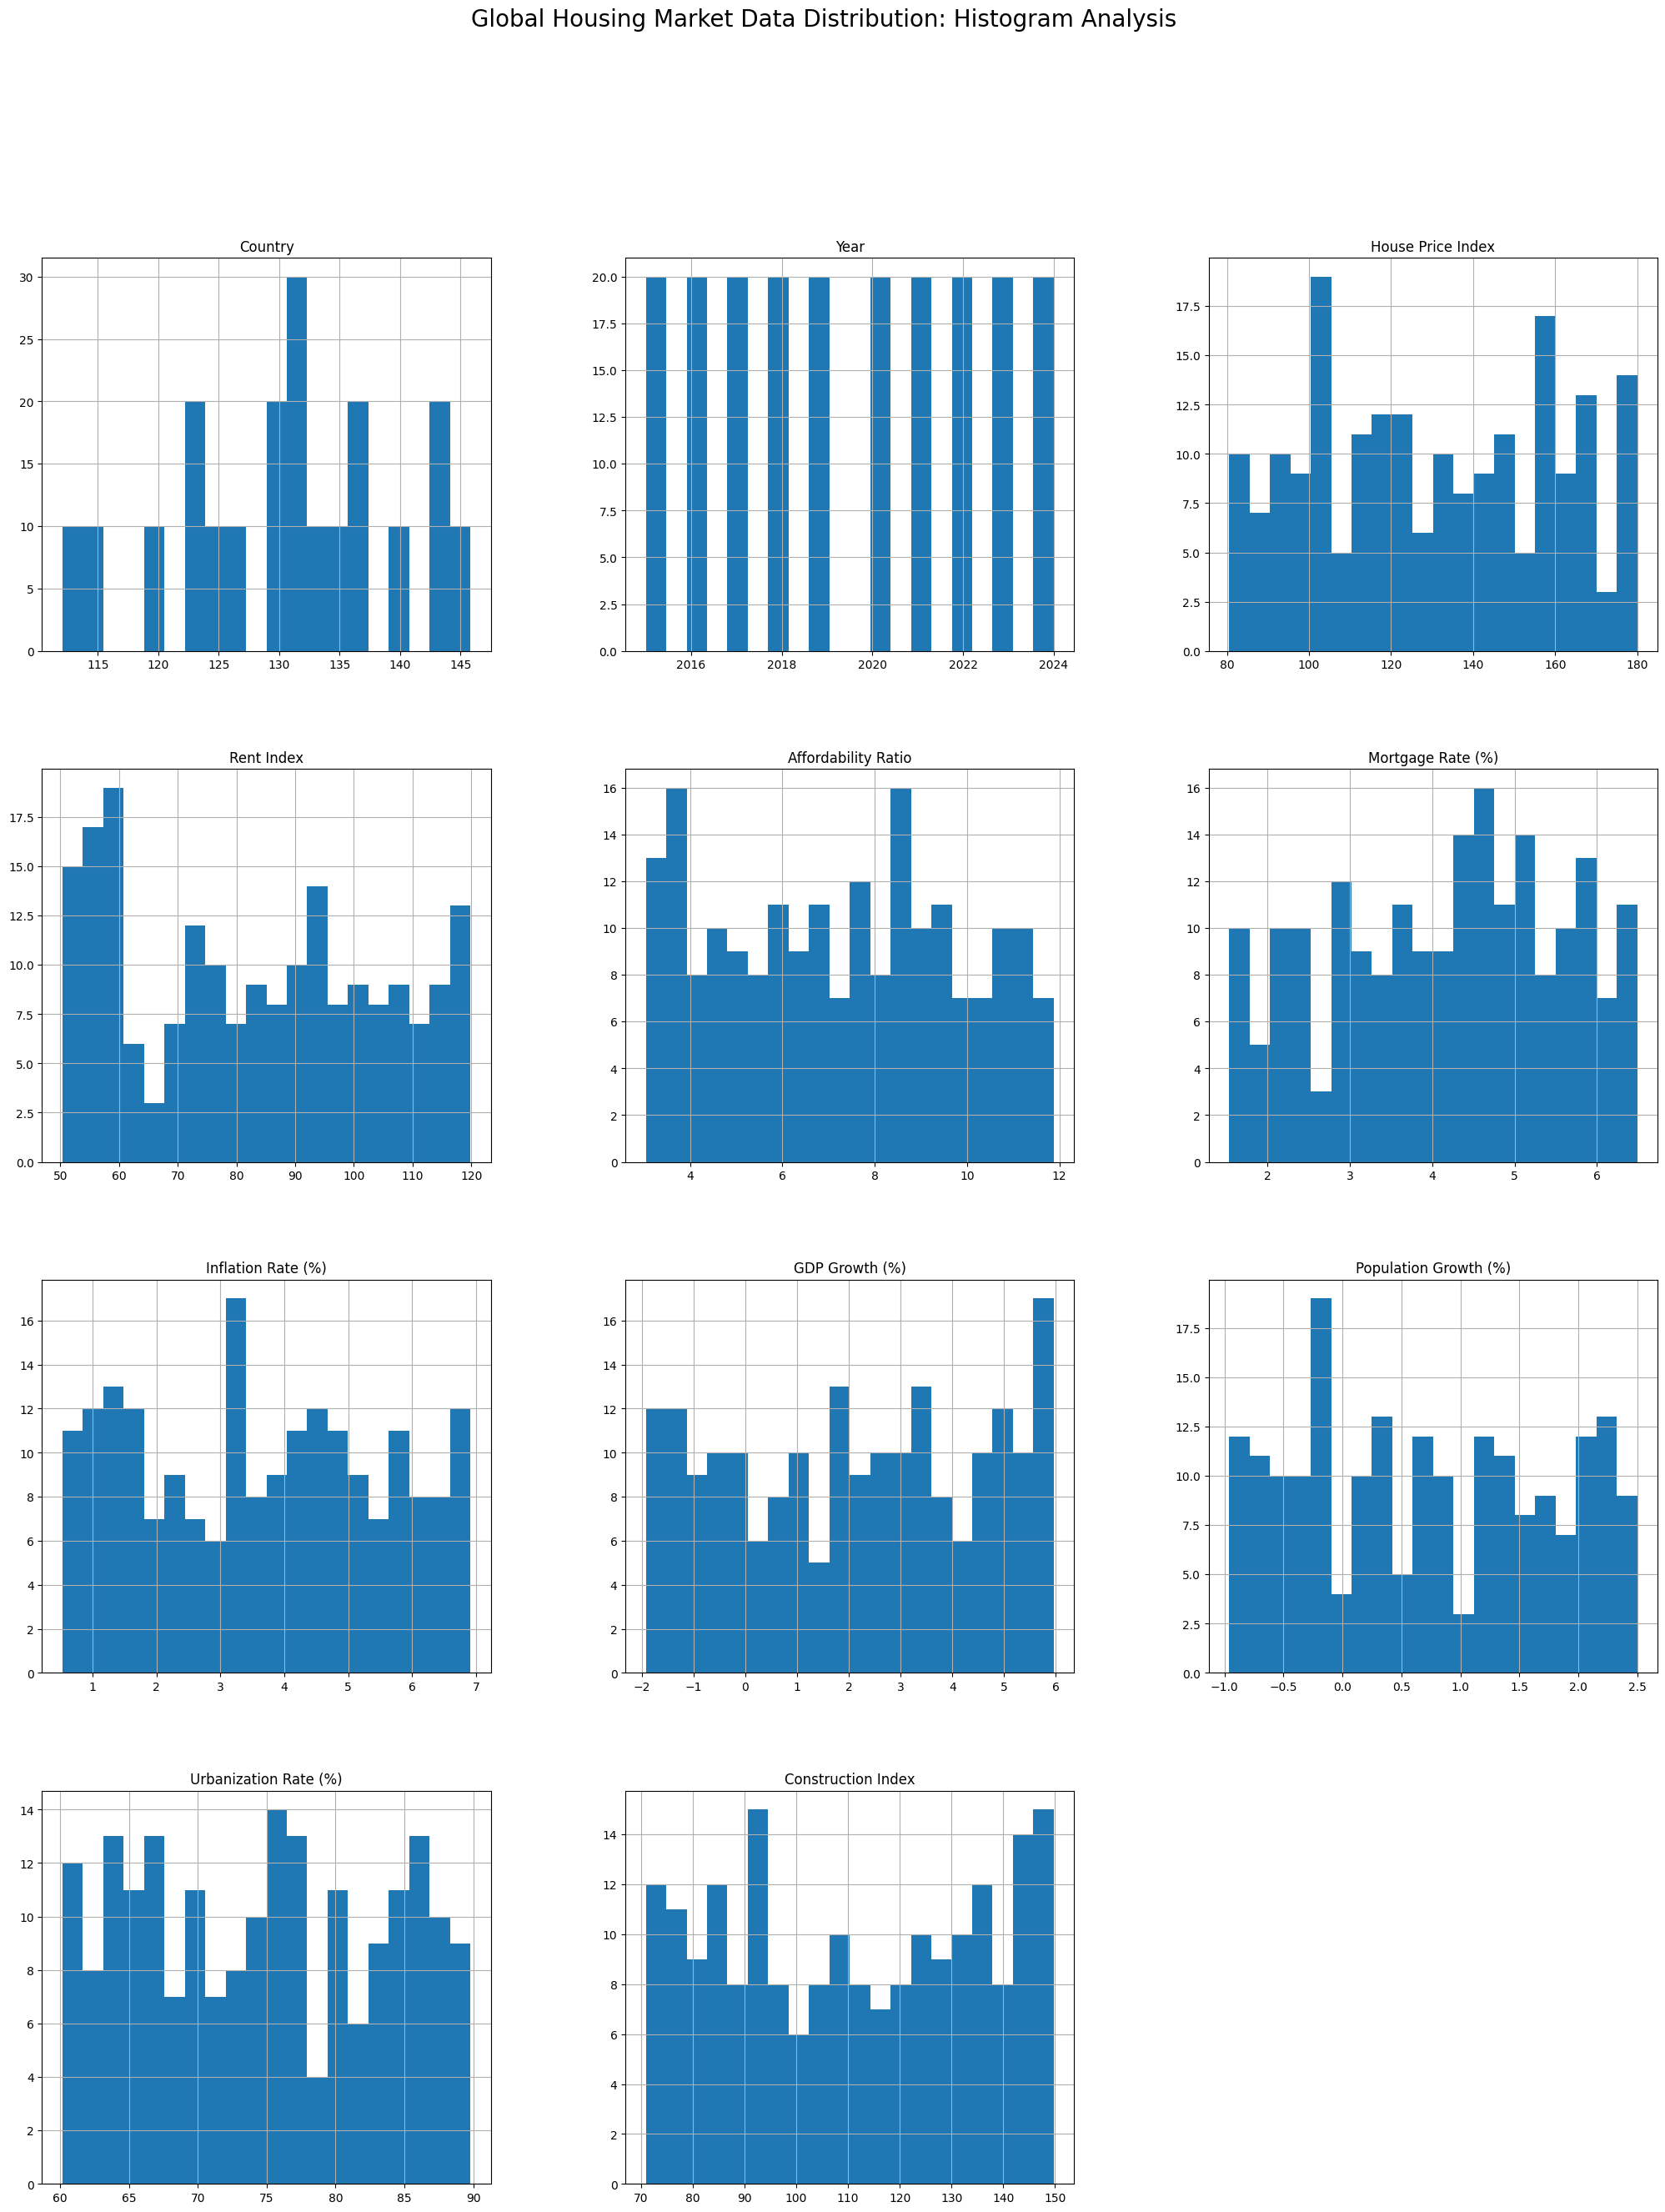

In [29]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle('Global Housing Market Data Distribution: Histogram Analysis',fontsize=20)
plt.show()

In [30]:
#calculate skewness for each column
skewness = df.skew()

#Sort the skewness values in ascending order
sorted_skewness=skewness.sort_values(ascending=True)

#Display thr sorted skewness values
print(sorted_skewness)

Country                 -0.247426
Mortgage Rate (%)       -0.185716
GDP Growth (%)          -0.076450
Construction Index      -0.015740
Year                     0.000000
Affordability Ratio      0.018174
Inflation Rate (%)       0.028008
Urbanization Rate (%)    0.029882
House Price Index        0.033090
Population Growth (%)    0.072635
Rent Index               0.085779
dtype: float64


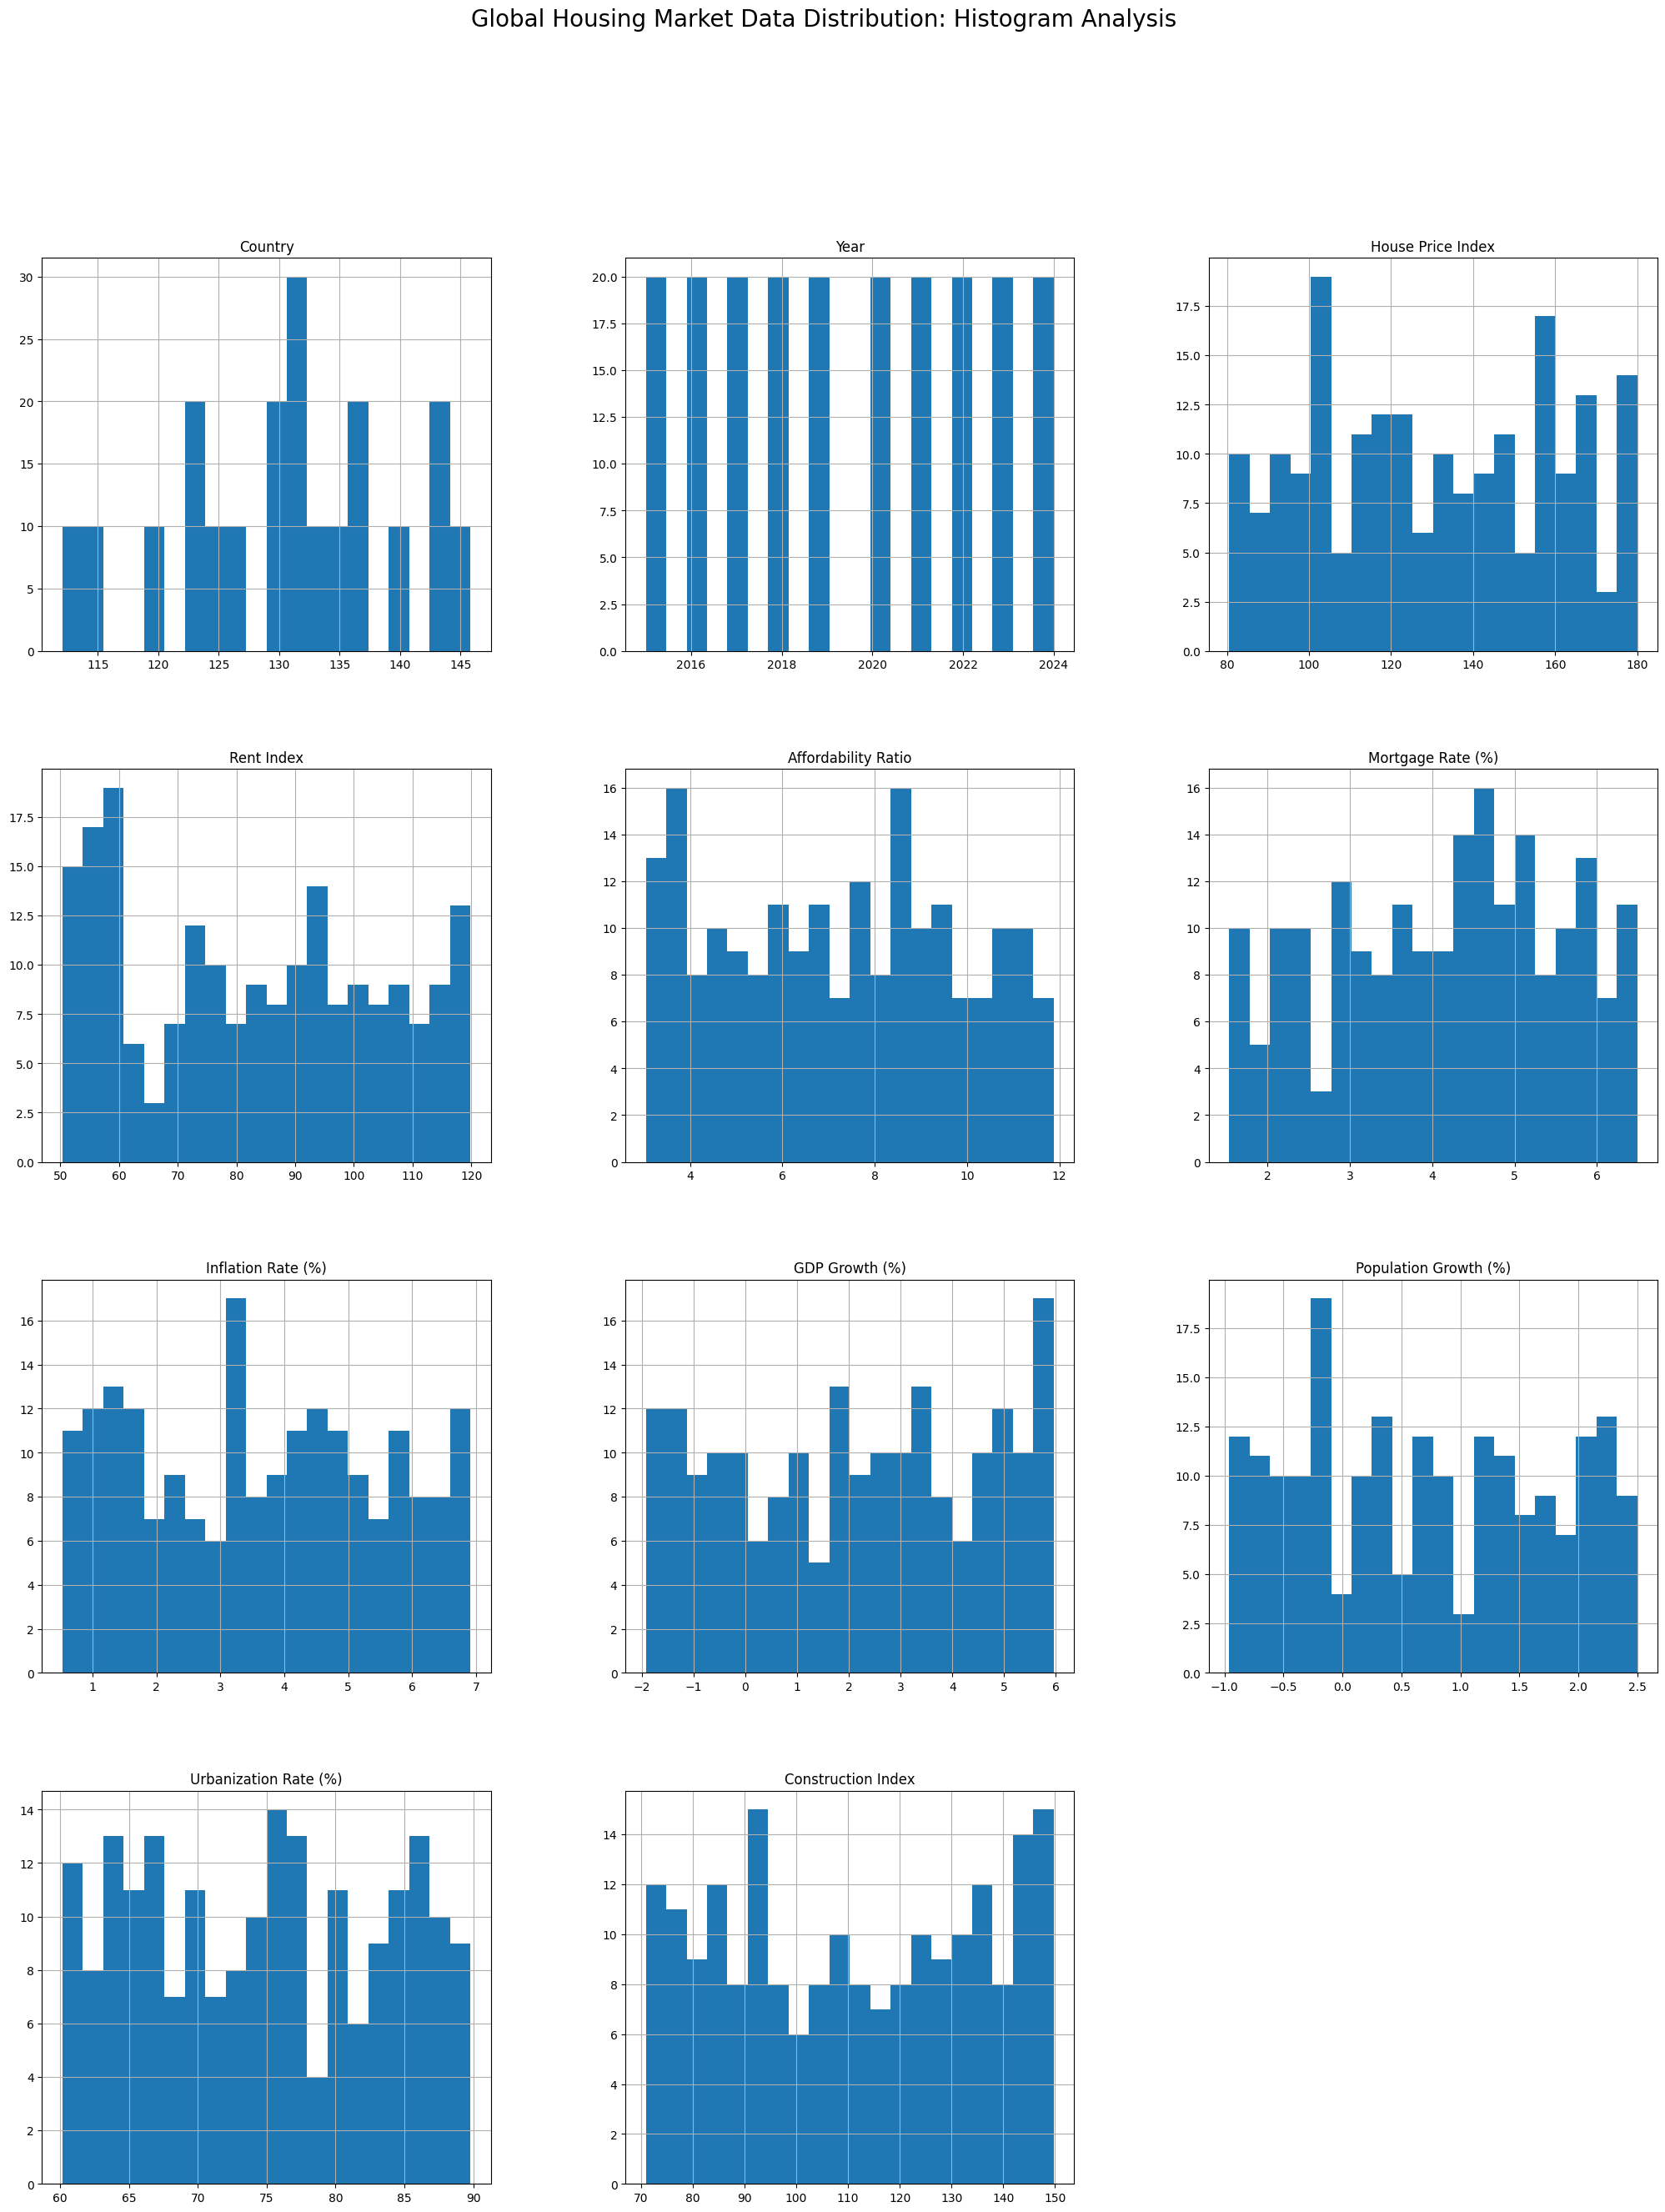

In [32]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle('Global Housing Market Data Distribution: Histogram Analysis',fontsize=20)
plt.show()

## removing Unwanted features

### Based on Correlation

<Axes: >

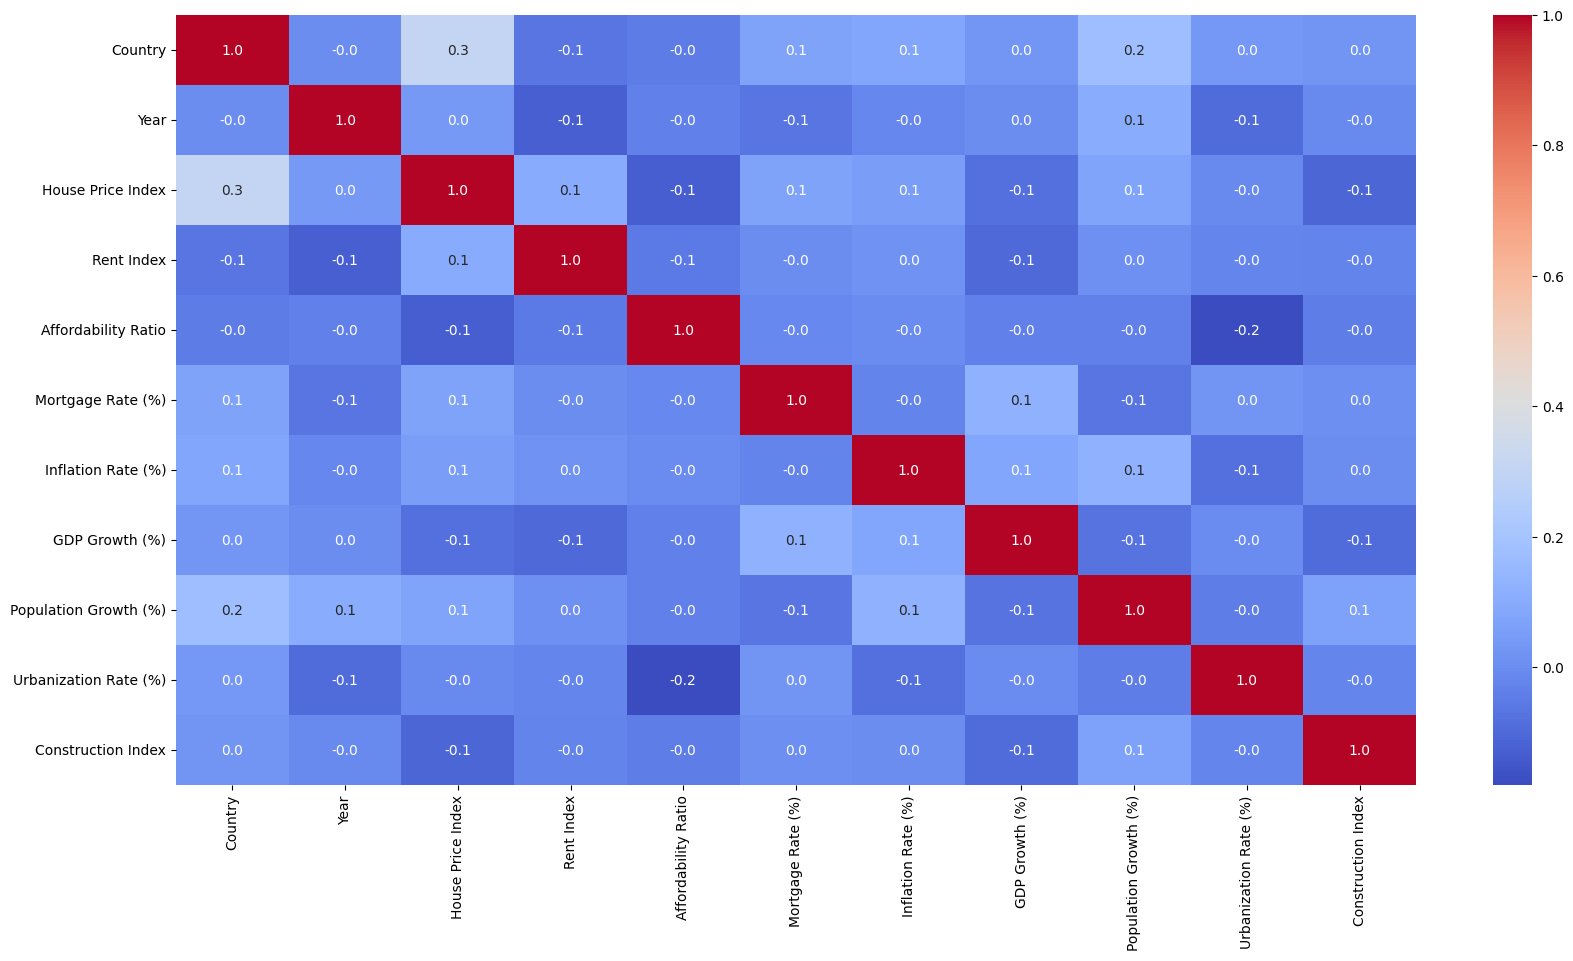

In [33]:
plt.figure(figsize=(20,10))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm',fmt='0.01f',annot_kws=None)

<Axes: >

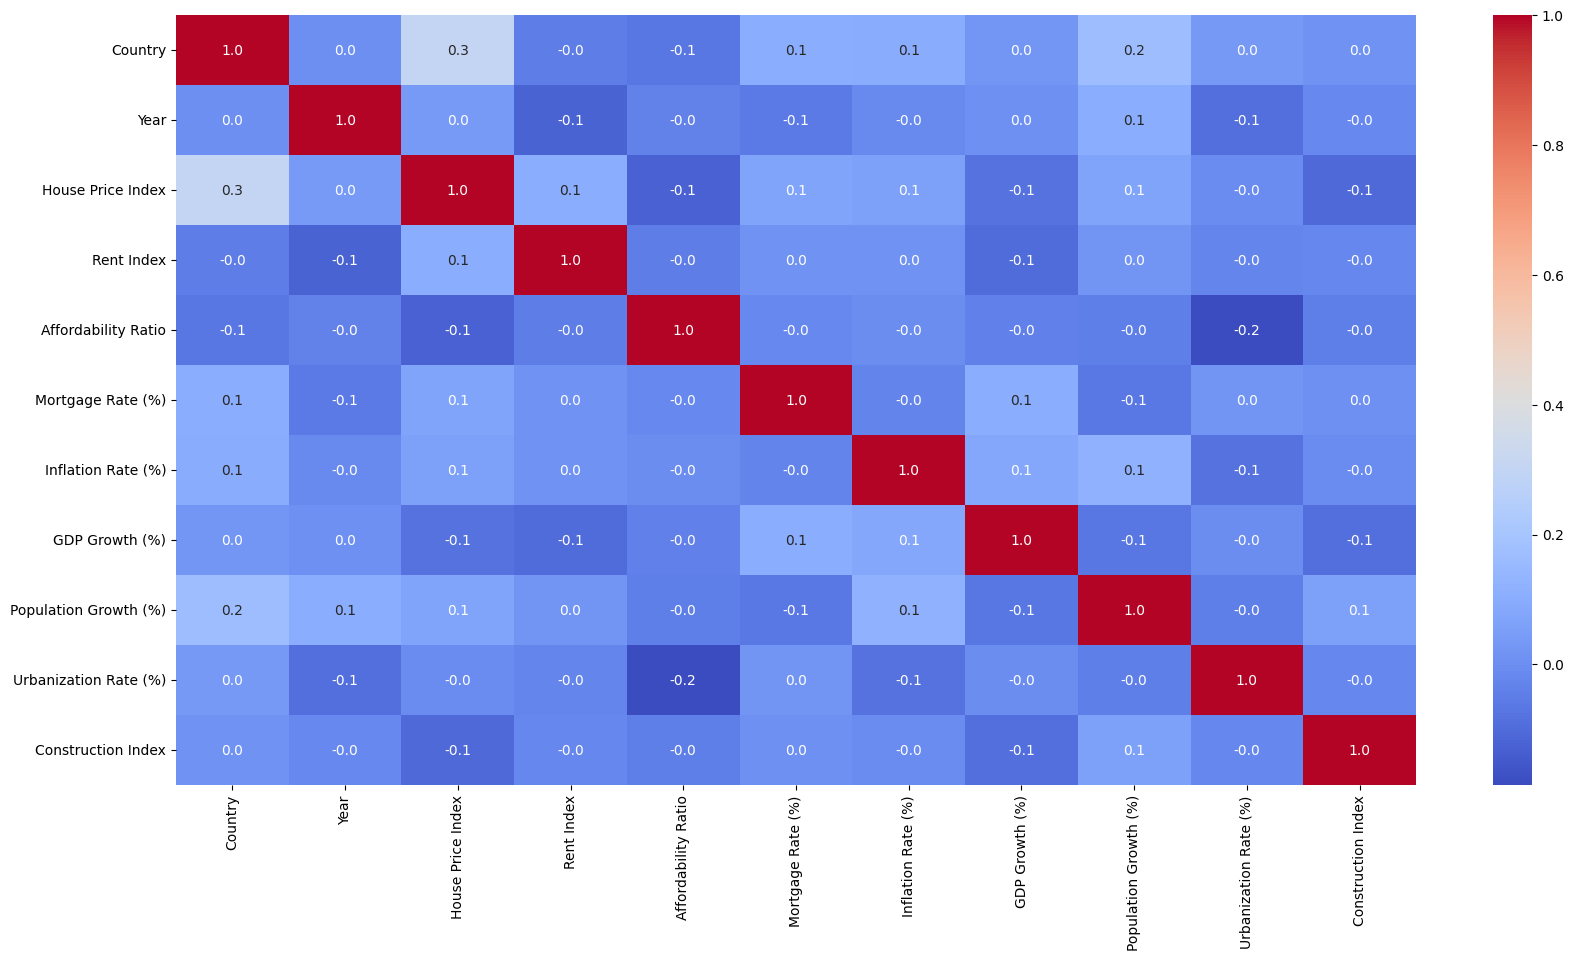

In [34]:
plt.figure(figsize=(20,10))
corr=df.corr(method='spearman')
sns.heatmap(corr,annot=True, cmap='coolwarm',fmt='0.01f',annot_kws=None)

<Axes: >

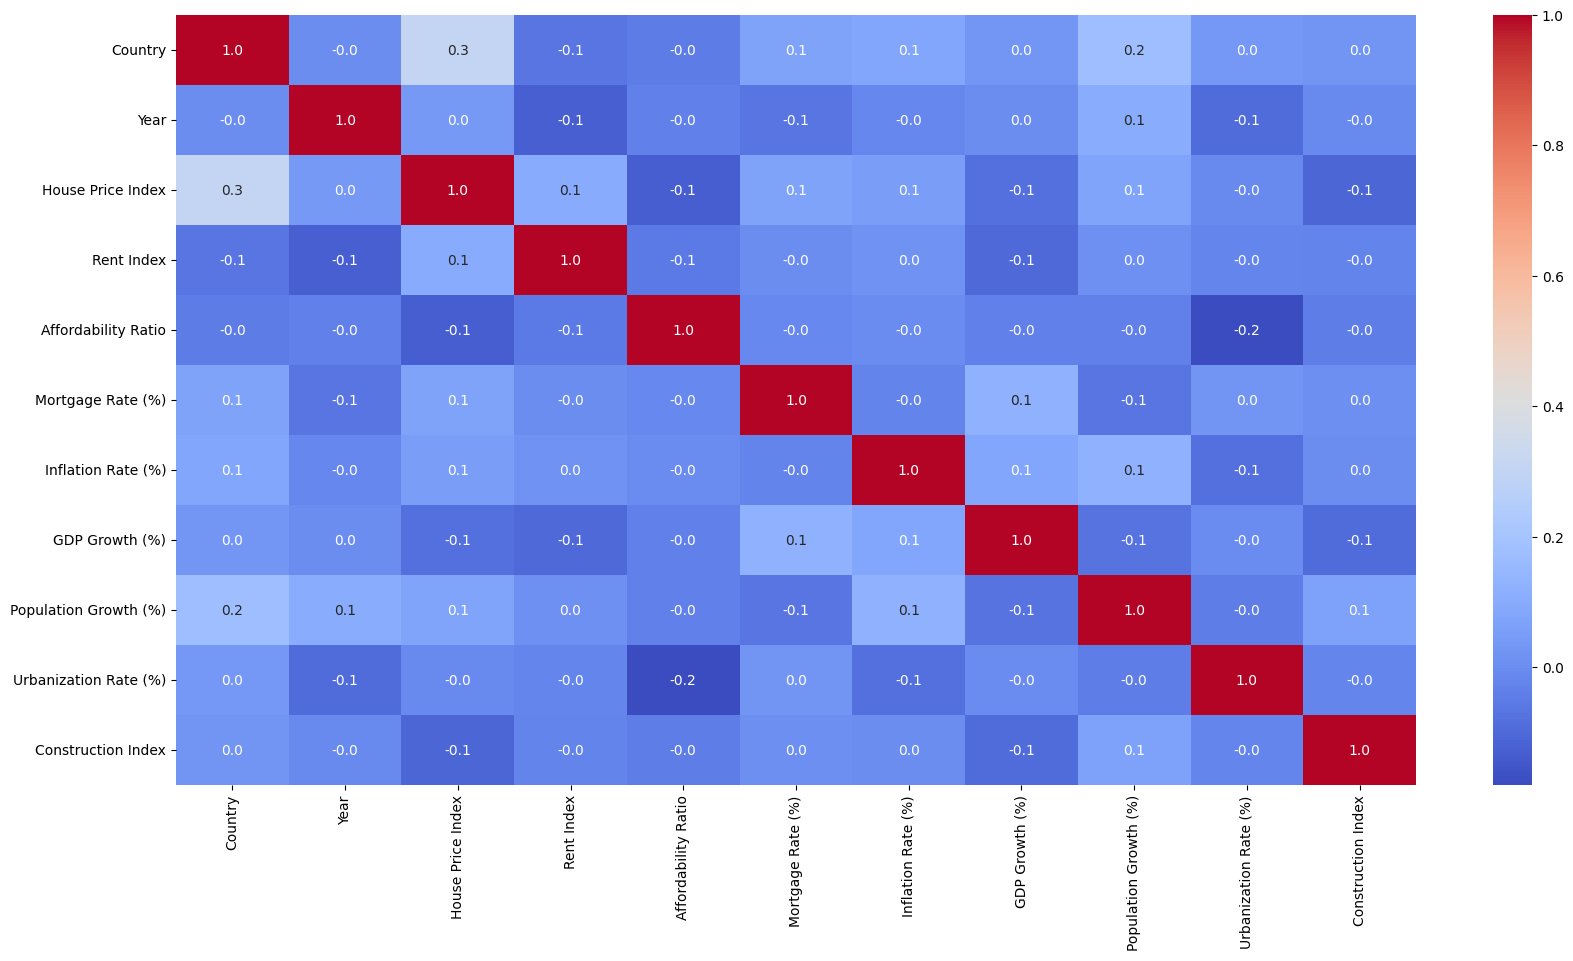

In [35]:
plt.figure(figsize=(20,10))
corr=df.corr(method='pearson')
sns.heatmap(corr,annot=True, cmap='coolwarm',fmt='0.01f',annot_kws=None)

<Axes: >

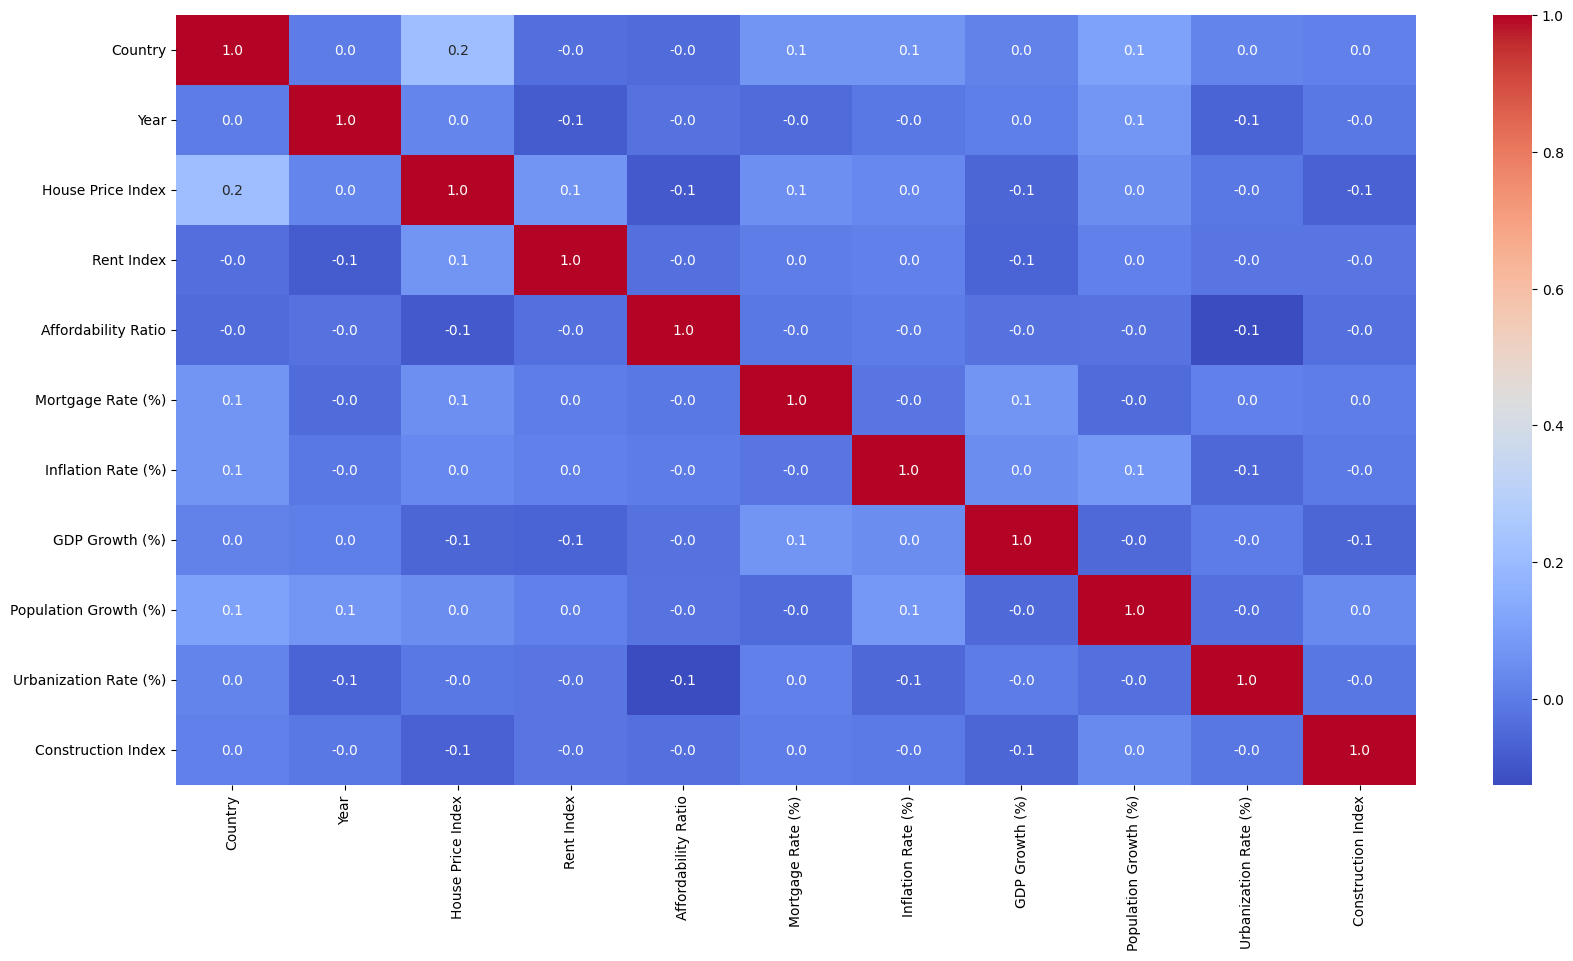

In [36]:
plt.figure(figsize=(20,10))
corr=df.corr(method='kendall')
sns.heatmap(corr,annot=True, cmap='coolwarm',fmt='0.01f',annot_kws=None)

In [37]:
correlation_matrix=df.corr()

#set the correlation threshold
threshold=0.5

#find pairs of features with high correlation
highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    #check if the absolute correlation exceeds the threshold
    if abs(correlation_matrix.iloc[i,j])> threshold:
      highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
#print all pairs of highly correlated featured
print(highly_correlated_pairs)

[]


#Scaling

### Standardization:

Standardization transforms data to have a mean of 0 and a standard deviation of1.This is done by subtracting the mean of the data and dividing by the standard deviation.

Standardization is useful when your data follows a normal distribution or if using machine learning algorithms that assume normally distributed data(e.g, linear regression,logistic regression,SVM,etc) it works well with algorithms that rely on the distance between data points(e.g,K-NN,PCA).

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the original data for comparison
loan_scaled_df = df.copy()

# Select numeric columns, excluding 'House Price Index'
numeric_columns = df.drop(columns=['House Price Index']).select_dtypes(include=['number']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler only to the numeric columns
loan_scaled_df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# View the result
loan_scaled_df.head()


,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,0.406253,0.000000,117.454012,0.952441,0.740696,0.597331,0.153914,0.148436,0.047605,0.871568,0.598226
1,0.406253,0.111111,150.807258,0.015634,0.982973,0.833581,0.211292,0.174657,0.174399,0.302352,0.520672
2,0.406253,0.222222,123.194502,0.288222,0.618352,0.133323,0.292596,0.361986,0.450270,0.789518,0.190501
3,0.406253,0.333333,131.423444,0.591569,0.042585,0.606311,0.168692,0.056117,0.948878,0.972313,0.808753
4,0.406253,0.444444,110.461377,0.093275,0.692059,0.437153,0.119296,0.492750,0.023632,0.915272,0.250533


##Normalization

Normalization tranforms data to a specific range,usually[0,1] or [-1,1]The idea is to rescale the data without distoring the differences in the ranges of values.

Normalization is preferred when you know that the data does not follow a normal distribution and when you need to constain the data within a fixed range. it is commonly used in algorithms such as neural networks and k-means clustering, where the magnitude of the data matters.

## Handling outliers

### Boxplots

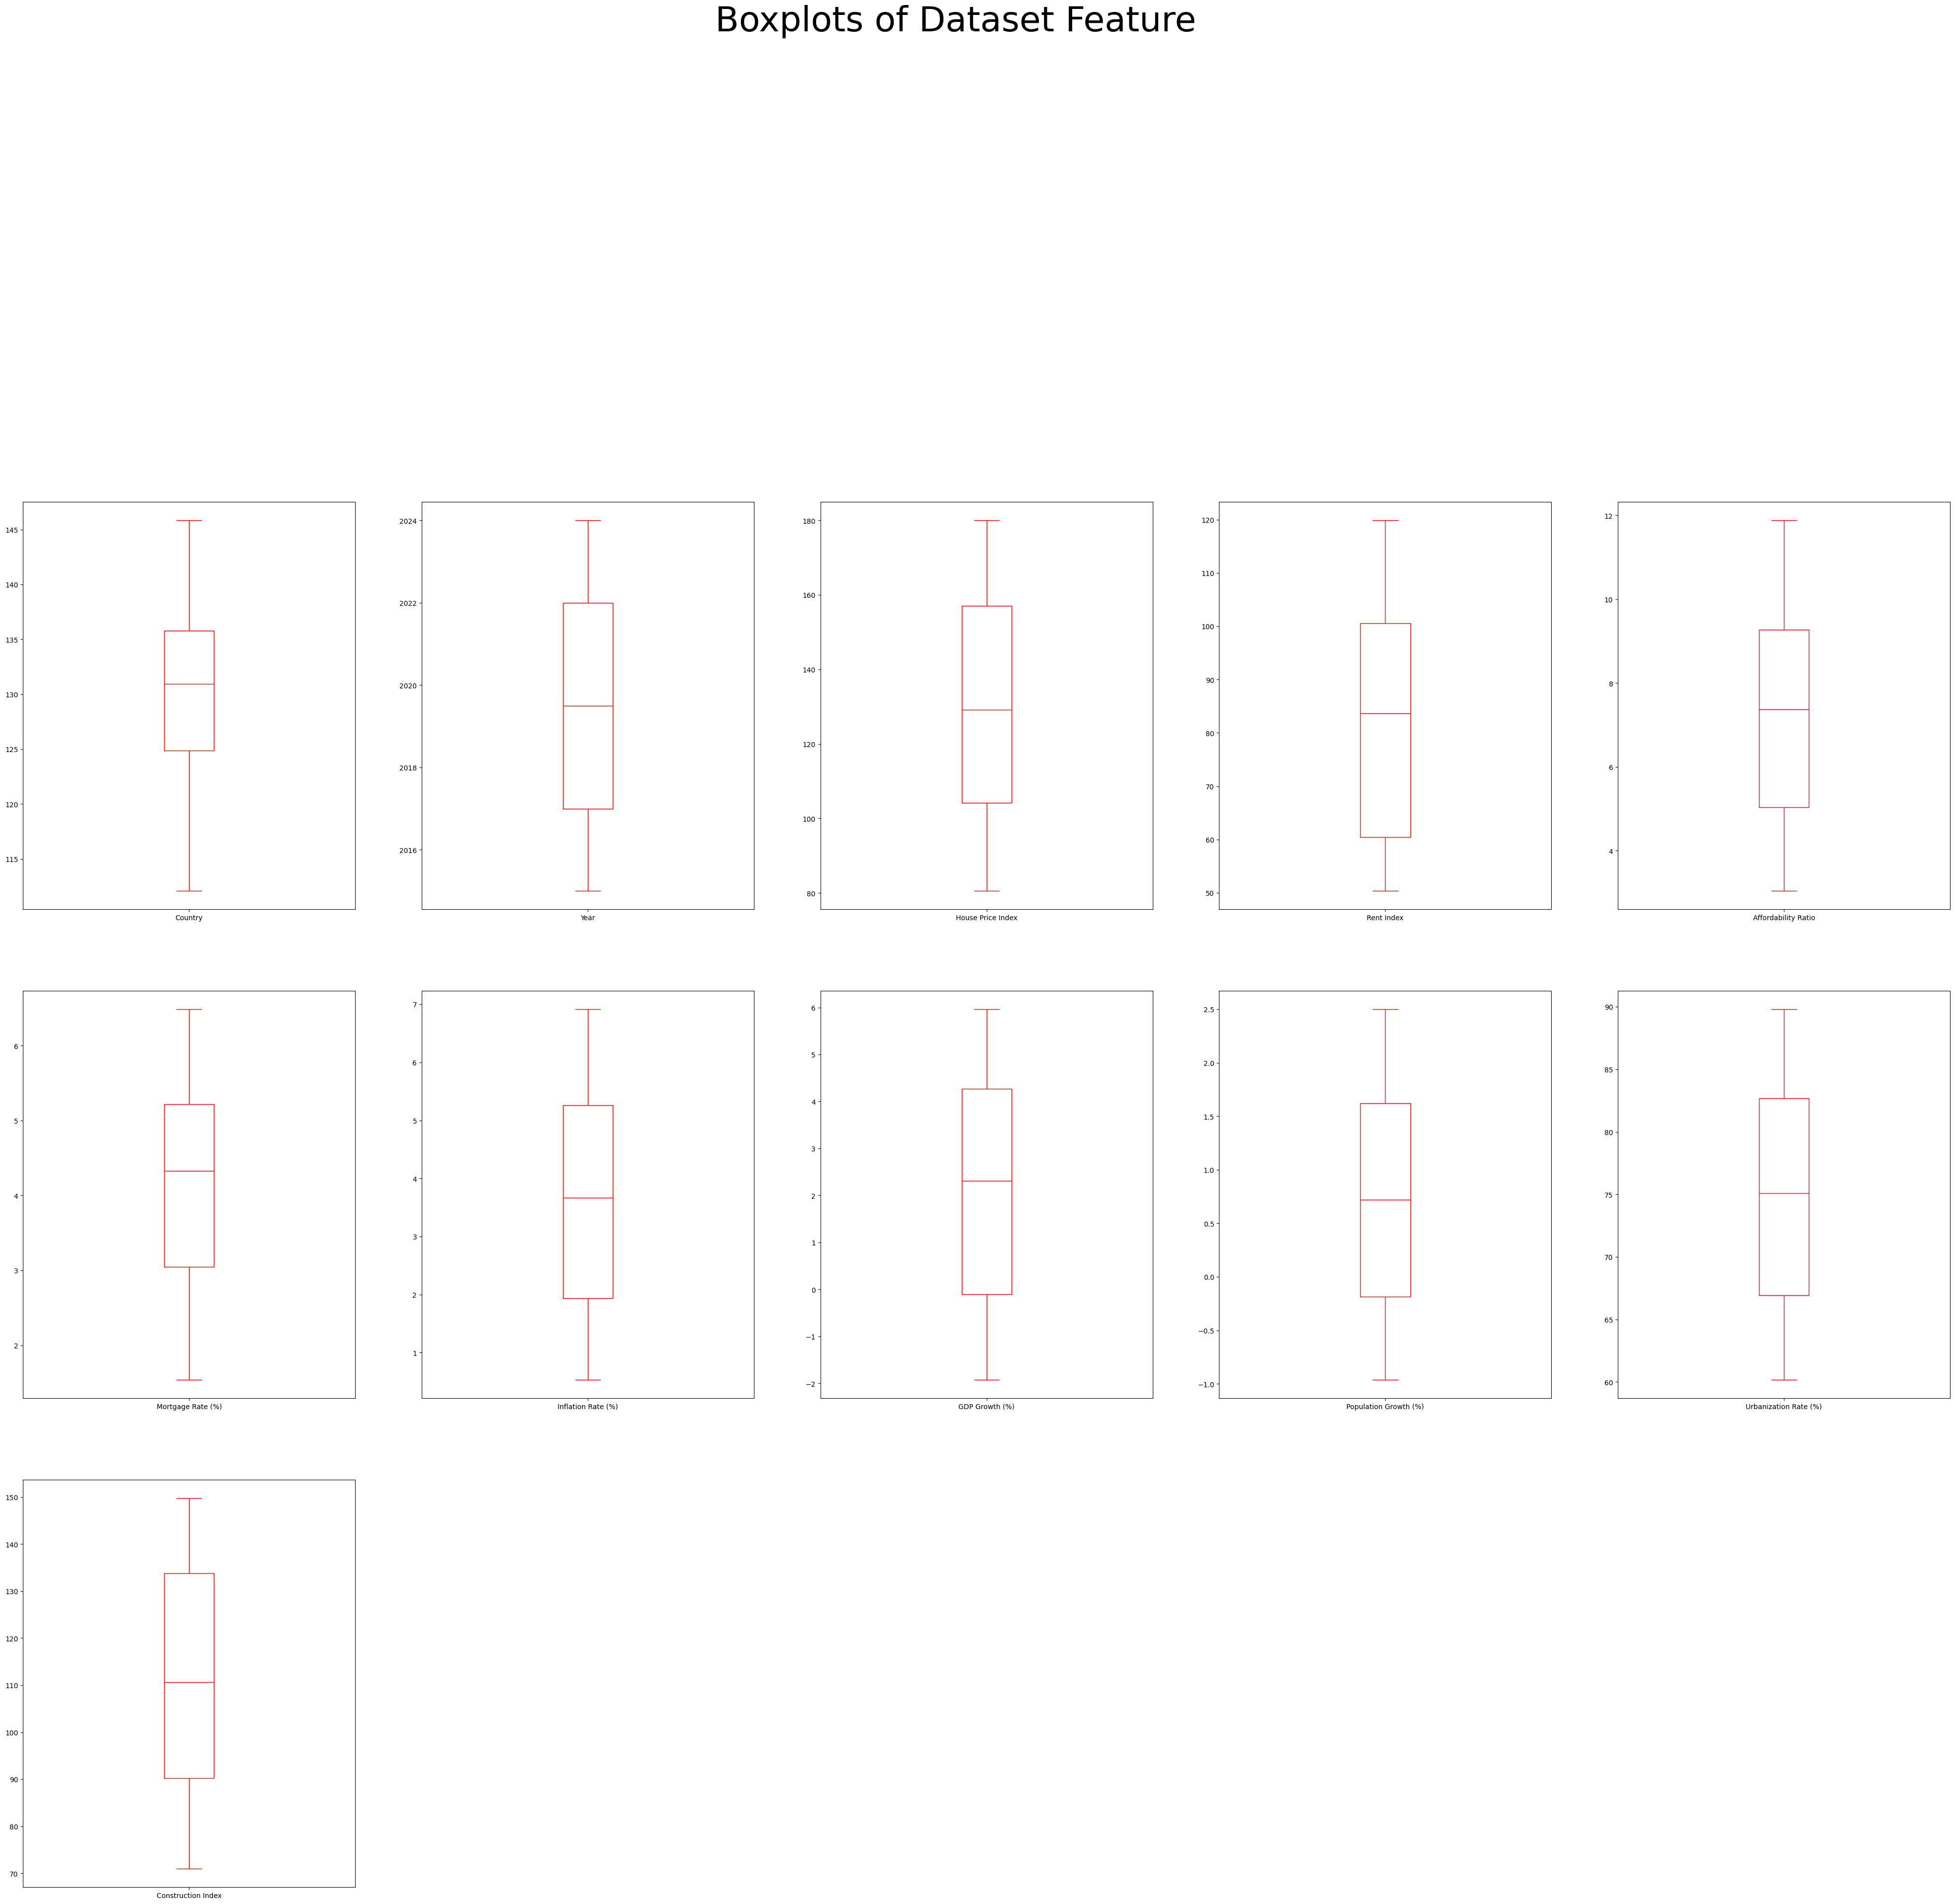

In [40]:
df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='red')
plt.suptitle('Boxplots of Dataset Feature',fontsize=50)
plt.show()

In [41]:
#crete a copy of the original data for comparison
df_copy=df.copy()

def remove_outliers_iqr(df,exclude):
    # Loop through numeric columns
    for column in df.select_dtypes(include=['number']):
      if column in exclude_columns:
        continue #skip excluded columns

      Q1=df[column].quantile(0.25)
      Q3=df[column].quantile(0.75)
      IQR=Q3-Q1

      #define outlier bounds
      lower_bound=Q1-1.5*IQR
      upper_bound=Q3+1.5*IQR

      #filter out the outliers
      df=df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]

    return df
#define the columns to exclude
exclude_columns=['House Price Index']

#remove outliers
df=remove_outliers_iqr(df,exclude_columns)

#print shapes of the data before amd after removing outliers
print('shape of data before removing outliers:',df_copy.shape)
print('shape of data after removing outliers:',df.shape)
print('number of outliers removed :',df_copy.shape[0]-df.shape[0])

shape of data before removing outliers: (200, 11)
shape of data after removing outliers: (200, 11)
number of outliers removed : 0


#Model Training

## Regression Modeling

In [42]:
x1=df.drop('House Price Index',axis=1)
y1=df[['House Price Index']]

In [43]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)

print('Shape of Training Features',x1_train.shape)
print('Shape of Testing Features',x1_test.shape)
print('Shape of Traing Target',y1_train.shape)
print('Shape of Testing Target',y1_test.shape)

Shape of Training Features (160, 10)
Shape of Testing Features (40, 10)
Shape of Traing Target (160, 1)
Shape of Testing Target (40, 1)


In [44]:
models={
    'Linear_Regression':LinearRegression(),
    'RandomForest_Regressor':RandomForestRegressor(),
    'GradientBoosting_Regressor':GradientBoostingRegressor(),
    'DecisionTree_Regressor':DecisionTreeRegressor(),
    'SVM':SVR(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'BaggingRegressor':LGBMRegressor(),
    'XGBRegressor':XGBRegressor()
}

In [45]:
#Dictionary to store results
results={'Model':[],'MSE':[],'MAE':[],'R2':[]}
#Loop through the models,train them,and calculate the metrics
for model_name,model in models.items():
    #Train the model
    model.fit(x1_train,y1_train)

    #make predictions
    y1_pred=model.predict(x1_test)

    # calculate metrics
    mse=mean_squared_error(y1_test,y1_pred)
    mae=mean_absolute_error(y1_test,y1_pred)
    r2=r2_score(y1_test,y1_pred)

    #store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2'].append(r2)
#Convert results to a DataFrame
results_df=pd.DataFrame(results)
# Display the results
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 10
[LightGBM] [Info] Start training from score 130.820454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

,Model,MSE,MAE,R2
0,Linear_Regression,807.680718,24.706880,0.123426
1,RandomForest_Regressor,873.492116,24.961366,0.052001
2,GradientBoosting_Regressor,943.982161,24.563922,-0.024502
3,DecisionTree_Regressor,1505.143404,30.874625,-0.633529
4,SVM,923.287772,27.509830,-0.002042
5,AdaBoostRegressor,988.077178,27.055086,-0.072358
6,ExtraTreesRegressor,881.771734,25.600351,0.043015
7,BaggingRegressor,871.097073,24.100965,0.054600
8,XGBRegressor,1064.779175,25.893030,-0.155603


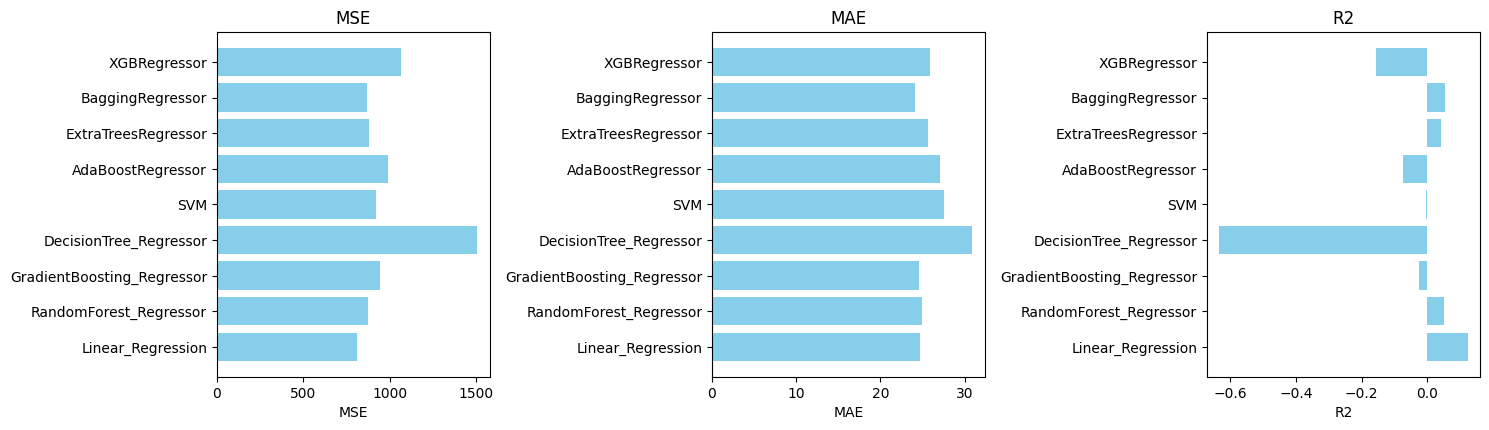

In [46]:
#ploting each metric
metrics=['MSE','MAE','R2']
plt.figure(figsize=(15,8))

for i,metric in enumerate(metrics):
    plt.subplot(2,3,i+1)
    plt.barh(results_df['Model'],results_df[metric],color='skyblue')
    plt.title(metric)
    #plt.xlim(0,1)
    plt.xlabel(metric)
plt.tight_layout()
plt.show()

### Regression on scalad Data

In [47]:
x1s=loan_scaled_df.drop('House Price Index',axis=1)
y1s=loan_scaled_df[['House Price Index']]
x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)
results={'Model':[],'MSE':[],'MAE':[],'R2':[]}

for model_name,model in models.items():
    #Train the model
    model.fit(x1s_train,y1s_train)

    #make predictions
    y1s_pred=model.predict(x1s_test)

    # calculate metrics
    mse1=mean_squared_error(y1s_test,y1s_pred)
    mae1=mean_absolute_error(y1s_test,y1s_pred)
    r21=r2_score(y1s_test,y1s_pred)

    #store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse1)
    results['MAE'].append(mae1)
    results['R2'].append(r21)
#Convert results to a DataFrame
results_df1=pd.DataFrame(results)
# Display the results
#results_df1

#Sort ny accuracy
results_df1=results_df1.sort_values(by='MSE',ascending=True)

# display the sorted DataFrame with background gradient
results_df1.style.background_gradient('Blues')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 10
[LightGBM] [Info] Start training from score 130.820454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

,Model,MSE,MAE,R2
0,Linear_Regression,807.680718,24.706880,0.123426
6,ExtraTreesRegressor,867.164464,25.512442,0.058868
4,SVM,904.530670,27.153666,0.018315
1,RandomForest_Regressor,925.394070,26.087262,-0.004328
2,GradientBoosting_Regressor,946.154554,24.421761,-0.026860
7,BaggingRegressor,948.938364,25.813585,-0.029881
5,AdaBoostRegressor,1042.808640,27.244493,-0.131758
8,XGBRegressor,1064.779175,25.893030,-0.155603
3,DecisionTree_Regressor,1553.981666,31.801259,-0.686533


#Pickle file

In [49]:
import pickle
#save the regression model
r_model=GradientBoostingRegressor()
r_model.fit(x1s_train,y1s_train.values.ravel())
with open('regression_model.pkl','wb') as file:
  pickle.dump(r_model,file)